In [15]:
import datetime, os, pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
#functions from LSTM script commented '#LSTM'
#from Scripts.LSTM import *

%matplotlib inline
plt.style.use('seaborn-whitegrid')

models_path = os.path.join('..', 'models')
images_path = os.path.join('..', 'images')

In [2]:
os.system("start C:/Users/Giedrius/Music/1.mp3") 

0

#### In theory deep learning models can approximate any continues function. In this jupyter notebook we do LSTM recurent neural network model tuning experiments on noisy Bitcoin price prediction models. But firstly lets look how powerful LSTM is forcasting     $f(x) = x\sin(x)/400$ 

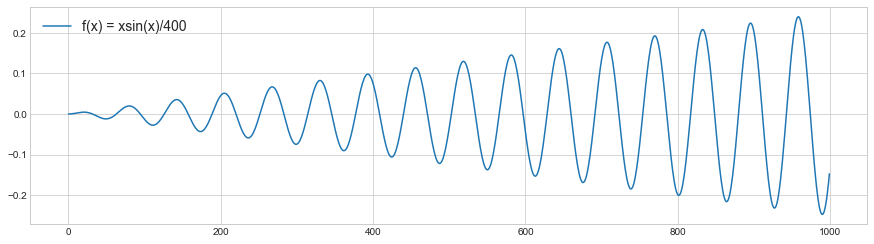

In [8]:
x = np.arange(0.0, 100, 0.1)
ts =  x*np.sin(x)/400
plt.figure(figsize=(15,4))
plt.plot(ts, label = "f(x) = xsin(x)/400")
plt.legend(prop={'size': 14})

In [10]:
window_size = 50
x_train, y_train, x_test, y_test, rows = transform_data(ts, window_size, normalise_window = False) #LSTM

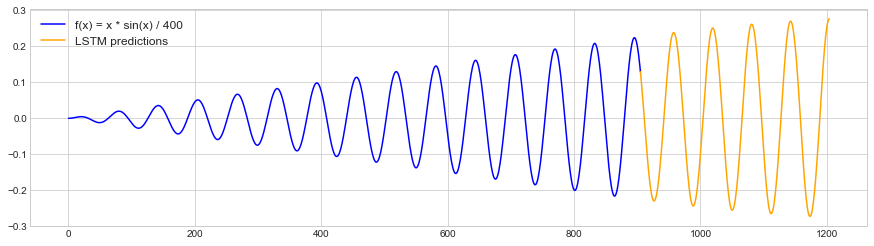

In [11]:
#create variable for ploting
predictions = predict_sequence_full(model, x_test, window_size, 300) #LSTM
none = [None]*(len(y_train)+ window_size)
ts1 = []
ts1.extend(none)
ts1.extend(predictions)
#plot
plt.figure(figsize=(15,4))
plt.plot(ts[:-(len(y_test)-1)], color='blue', label = 'f(x) = x * sin(x) / 400')
plt.plot(ts1, color='orange', label= 'LSTM predictions')
plt.legend(prop={'size': 12})

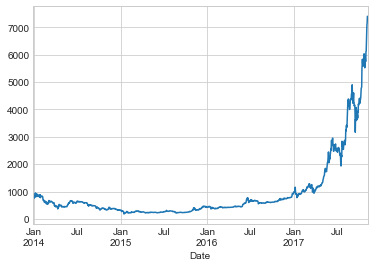

In [2]:
urlMarket = 'http://coinmarketcap.com/currencies/bitcoin/historical-data/?start=20131227&end=20171106'
df2 = pd.read_html(urlMarket)[0]
df2.index  = [datetime.datetime.strptime(date, '%b %d, %Y') for date in df2["Date"]]
df2.index.name = 'Date'
df2 = df2[['Open','Volume']].sort_index()
df = df2['Open'].sort_index()
df.plot()

In [3]:
window_size = 50
x_train, y_train, x_test, y_test, rows = transform_data(df, window_size, True, )
y_test_usd = get_real_value(y_test, df,rows)

### Primary LSTM models parametres:
* neurons 32,32 
* dropout 0.3
* epochs 250
* window size 50

With these LSTM parameters we first tune the number of batches. Every batches configuration repeated 3 times.

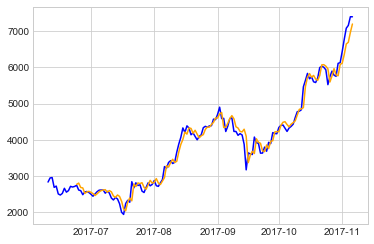

In [34]:
plt.plot(df[-150:], color='blue')
plt.plot(a[-150:], color='orange')

In [16]:
with open('C:/Users/Giedrius/Documents/Python/Bitcoin modeling/results/neurons', "rb") as f:
    result = pickle.load(f)
neurons = [16, 32,64,128,256]
neurons_labels = [str(n1)+"_"+ str(n2) for n1 in neurons for n2 in neurons]
rmse = [np.mean(r[0], axis = 0) for r in result]
mape = [np.mean(r[1], axis = 0) for r in result]

mape = pd.DataFrame(mape, index = neurons_labels).transpose()
rmse = pd.DataFrame(rmse, index = neurons_labels).transpose()

In [18]:
rmse.style.apply(highlight_min, axis=1)

,16_16,16_32,16_64,16_128,16_256,32_16,32_32,32_64,32_128,32_256,64_16,64_32,64_64,64_128,64_256,128_16,128_32,128_64,128_128,128_256,256_16,256_32,256_64,256_128,256_256
0,432.248,425.209,396.279,644.354,714.209,407.418,325.37,450.387,545.808,618.975,335.087,287.053,319.39,434.865,491.457,348.166,301.766,295.081,312.346,343.337,320.855,298.898,289.486,298.039,327.668
1,619.856,662.216,633.17,931.056,1005.91,621.928,528.189,753.354,864.548,961.29,538.931,466.644,540.708,737.893,799.399,583.982,501.988,489.5,525.614,574.513,534.926,500.229,479.197,494.87,550.495
2,815.526,867.966,823.98,1092.96,1119.7,802.875,684.703,937.865,1007.69,1092.12,698.732,603.764,700.591,918.982,946.093,756.576,655.157,637.208,685.42,730.715,697.64,666.766,633.539,649.348,715.34
3,986.159,1031.17,975.903,1190.6,1179.25,955.332,811.418,1079.46,1101.94,1172,834.22,723.2,835.617,1062.92,1050.28,909.699,790.998,762.358,816.786,853.716,841.284,814.734,763.215,774.641,845.09
4,1124.41,1156.49,1091.79,1248.81,1211.68,1077.4,907.393,1184.72,1155.11,1217.68,940.802,816.589,942.264,1174.07,1120.01,1035.54,899.198,862.063,920.332,950.569,959.54,938.953,866.922,872.349,947.944
5,1236.19,1253.64,1182.36,1282.52,1229.18,1176.6,981.091,1264.87,1182.92,1245.45,1025.77,890.637,1027.09,1261.83,1168.27,1139.45,985.853,942.433,1003.12,1029.47,1054.44,1042.53,950.241,949.542,1031.75
6,1326.69,1329.62,1254.38,1300.95,1238.63,1258.02,1038.38,1326.87,1194.68,1264.07,1094.15,949.889,1094.9,1331.79,1202.4,1225.26,1055.64,1007.66,1069.12,1094.57,1128.78,1127.52,1016.87,1010.39,1099.94
7,1403.96,1392.94,1316.57,1312.28,1246.09,1329.01,1086.57,1379.12,1198.7,1281.59,1153.07,1001.94,1153.51,1392.05,1231.76,1299.82,1116.44,1065.71,1127.05,1154.6,1189.76,1201.61,1074.89,1063.11,1161.31
8,1470.1,1446.14,1370.53,1319.11,1252.7,1390.97,1127.35,1423.38,1198.19,1299.16,1204.25,1047.6,1204.56,1444.25,1257.28,1365.69,1170.22,1117.85,1177.77,1209.35,1240.73,1266.91,1126.06,1109.03,1216.02
9,1528.31,1492.45,1418.89,1323.89,1259.42,1446.19,1162.11,1462.29,1195.34,1319.7,1249.05,1087.45,1249.09,1490.61,1280.69,1423.99,1217.87,1164.6,1222.3,1259.61,1283.88,1324.02,1170.47,1148.32,1264.76


In [11]:
def highlight_min(data, color='yellow'):
    '''
    highlight the maximum in a Series or DataFrame
    '''
    attr = 'background-color: {}'.format(color)
    #remove % and cast to float
    #data = data.replace('%','', regex=True).astype(float)
    if data.ndim == 1:  # Series from .apply(axis=0) or axis=1
        is_min = data == data.min()
        return [attr if v else '' for v in is_min]
    else:  # from .apply(axis=None)
        is_min = data == data.min().min()
        return pd.DataFrame(np.where(is_min, attr, ''),
                            index=data.index, columns=data.columns)